## References
- [1] Erlingsson, Pihur, and Korolova (2014) "RAPPOR: Randomized aggregatable privacy-preserving ordinal response" (ACM CCS).
- [2] Arcolezi et al (2022) "Improving the Utility of Locally Differentially Private Protocols for Longitudinal and Multidimensional Frequency Estimates" (Digital Communications and Networks).
- [3] Wang et al (2017) "Locally differentially private protocols for frequency estimation" (USENIX Security).

## Libraries

In [ ]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
params = {'axes.titlesize':'20',
          'xtick.labelsize':'20',
          'ytick.labelsize':'20',
          'font.size':'18',
          'legend.fontsize':'medium',
          'lines.linewidth':'2.5',
          'font.weight':'normal',
          'lines.markersize':'16',
          'text.latex.preamble': r'\usepackage{amsfonts}',
          'lines.markerfacecolor':'none'
          }
matplotlib.rcParams.update(params)
plt.rcParams["mathtext.fontset"] = "cm"
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## Longitudinal Estimator [2] of chaining two LDP protocols w.p. $p_1,q_1$ (first round - PRR) and $p_2,q_2$ (second round - IRR)

In [2]:
p1 = sym.Symbol('p1')
p2 = sym.Symbol('p2')
q1 = sym.Symbol('q1')
q2 = sym.Symbol('q2')
n = sym.Symbol('n') # Number of users
C = sym.Symbol('C(v_{i})')

print('estimator:')
f_L = sym.simplify((C-n*q2)/(p2-q2) - n*q1)/(n*(p1-q1))
f_L

estimator:


(C(v_{i}) - n*q1*(p2 - q2) - n*q2)/(n*(p1 - q1)*(p2 - q2))

## Expectation of the estimator (unbiased if $\mathbb{E}[f_L(v)]=f(v)$) [2]

In [3]:
p1 = sym.Symbol('p1')
p2 = sym.Symbol('p2')

q1 = sym.Symbol('q1')
q2 = sym.Symbol('q2')
n = sym.Symbol('n')
f = sym.Symbol('f')

E_n = n*f*(p1*p2 + (1-p1)*q2) + (n - n*f) * (q1*p2 + (1-q1)*q2)
E_fl = (E_n - n*q1*(p2 - q2) - n*q2) / (n*(p1 - q1) * (p2 - q2))
sym.simplify(E_fl)

f

The expected value converges to f(vi), i.e., unbiased estimation

## Variance of the estimator [2]

In [4]:
# approximate variance with f = 0
f = 0

sig = q1*p2 + (1 - q1) * q2 + f*(((p1*p2) - p1*(1-p2)) + (q2*(1-p1) - (1-q2)*(1-p1)))
    
sym.simplify((sig * (1 - sig)) / (n * (p1 - q1)**2 * (p2 - q2)**2))

(p2*q1 - q2*(q1 - 1))*(-p2*q1 + q2*(q1 - 1) + 1)/(n*(p1 - q1)**2*(p2 - q2)**2)

# Let $\epsilon_1 = \alpha \epsilon_{\infty}$, for $\alpha \in (0,1)$

## RAPPOR's [1] version that chains SUE in both PRR and IRR steps (a.k.a. L-SUE [2])

In [8]:
eps_perm = sym.Symbol('\epsilon_{\infty}')
alpha = sym.Symbol(r'\alpha')
eps_1 = alpha * eps_perm 
k = sym.Symbol('k')
n = sym.Symbol('n')
C = sym.Symbol('C(v_{i})')

p1 = sym.exp(eps_perm/2) / (sym.exp(eps_perm/2) + 1)
q1 = 1 / (sym.exp(eps_perm/2) + 1)

p2 = - (sym.sqrt((4 * sym.exp(7 * eps_perm / 2) - 4 * sym.exp(5 * eps_perm / 2) - 4 * sym.exp(
            3 * eps_perm / 2) + 4 * sym.exp(eps_perm / 2) + sym.exp(4 * eps_perm) + 4 * sym.exp(3 * eps_perm) - 10 * sym.exp(
            2 * eps_perm) + 4 * sym.exp(eps_perm) + 1) * sym.exp(eps_1)) * (sym.exp(eps_1) - 1) * (
                            sym.exp(eps_perm) - 1) ** 2 - (
                            sym.exp(eps_1) - sym.exp(2 * eps_perm) + 2 * sym.exp(eps_perm) - 2 * sym.exp(
                        eps_1 + eps_perm) + sym.exp(eps_1 + 2 * eps_perm) - 1) * (
                            sym.exp(3 * eps_perm / 2) - sym.exp(eps_perm / 2) + sym.exp(eps_perm) - sym.exp(
                        eps_1 + eps_perm / 2) - sym.exp(eps_1 + eps_perm) + sym.exp(eps_1 + 3 * eps_perm / 2) + sym.exp(
                        eps_1 + 2 * eps_perm) - 1)) / ((sym.exp(eps_1) - 1) * (sym.exp(eps_perm) - 1) ** 2 * (
                    sym.exp(eps_1) - sym.exp(2 * eps_perm) + 2 * sym.exp(eps_perm) - 2 * sym.exp(eps_1 + eps_perm) + sym.exp(
                eps_1 + 2 * eps_perm) - 1))
q2 = 1 - p2
display(p1, q1, p2, q2)

exp(\epsilon_{\infty}/2)/(exp(\epsilon_{\infty}/2) + 1)

1/(exp(\epsilon_{\infty}/2) + 1)

(-sqrt((4*exp(7*\epsilon_{\infty}/2) - 4*exp(5*\epsilon_{\infty}/2) - 4*exp(3*\epsilon_{\infty}/2) + 4*exp(\epsilon_{\infty}/2) + exp(4*\epsilon_{\infty}) + 4*exp(3*\epsilon_{\infty}) - 10*exp(2*\epsilon_{\infty}) + 4*exp(\epsilon_{\infty}) + 1)*exp(\alpha*\epsilon_{\infty}))*(exp(\epsilon_{\infty}) - 1)**2*(exp(\alpha*\epsilon_{\infty}) - 1) + (-exp(2*\epsilon_{\infty}) + 2*exp(\epsilon_{\infty}) + exp(\alpha*\epsilon_{\infty}) - 2*exp(\alpha*\epsilon_{\infty} + \epsilon_{\infty}) + exp(\alpha*\epsilon_{\infty} + 2*\epsilon_{\infty}) - 1)*(exp(3*\epsilon_{\infty}/2) - exp(\epsilon_{\infty}/2) + exp(\epsilon_{\infty}) - exp(\alpha*\epsilon_{\infty} + \epsilon_{\infty}/2) - exp(\alpha*\epsilon_{\infty} + \epsilon_{\infty}) + exp(\alpha*\epsilon_{\infty} + 3*\epsilon_{\infty}/2) + exp(\alpha*\epsilon_{\infty} + 2*\epsilon_{\infty}) - 1))/((exp(\epsilon_{\infty}) - 1)**2*(exp(\alpha*\epsilon_{\infty}) - 1)*(-exp(2*\epsilon_{\infty}) + 2*exp(\epsilon_{\infty}) + exp(\alpha*\epsilon_{\infty

-(-sqrt((4*exp(7*\epsilon_{\infty}/2) - 4*exp(5*\epsilon_{\infty}/2) - 4*exp(3*\epsilon_{\infty}/2) + 4*exp(\epsilon_{\infty}/2) + exp(4*\epsilon_{\infty}) + 4*exp(3*\epsilon_{\infty}) - 10*exp(2*\epsilon_{\infty}) + 4*exp(\epsilon_{\infty}) + 1)*exp(\alpha*\epsilon_{\infty}))*(exp(\epsilon_{\infty}) - 1)**2*(exp(\alpha*\epsilon_{\infty}) - 1) + (-exp(2*\epsilon_{\infty}) + 2*exp(\epsilon_{\infty}) + exp(\alpha*\epsilon_{\infty}) - 2*exp(\alpha*\epsilon_{\infty} + \epsilon_{\infty}) + exp(\alpha*\epsilon_{\infty} + 2*\epsilon_{\infty}) - 1)*(exp(3*\epsilon_{\infty}/2) - exp(\epsilon_{\infty}/2) + exp(\epsilon_{\infty}) - exp(\alpha*\epsilon_{\infty} + \epsilon_{\infty}/2) - exp(\alpha*\epsilon_{\infty} + \epsilon_{\infty}) + exp(\alpha*\epsilon_{\infty} + 3*\epsilon_{\infty}/2) + exp(\alpha*\epsilon_{\infty} + 2*\epsilon_{\infty}) - 1))/((exp(\epsilon_{\infty}) - 1)**2*(exp(\alpha*\epsilon_{\infty}) - 1)*(-exp(2*\epsilon_{\infty}) + 2*exp(\epsilon_{\infty}) + exp(\alpha*\epsilon_{\inft

## RAPPOR's longitudinal privacy guarantee ($\epsilon_{\infty}$)

In [9]:
sym.simplify(p1*(1-q1)/(q1*(1-p1)))

exp(\epsilon_{\infty})

## RAPPOR's first report guarantee ($\epsilon_1=\alpha \epsilon_{\infty}$)

In [10]:
ps = p1 * p2 + (1 - p1) * q2
qs = q1 * p2 + (1 - q1) * q2

sym.simplify(ps*(1-qs)/(qs*(1-ps)))

exp(\alpha*\epsilon_{\infty})

## RAPPOR's estimation

In [11]:
F_l = (C - n * q1 * (p2 - q2) - n * q2) / (n * (p1 - q1) * (p2 - q2))
sym.simplify(F_l)

(C(v_{i})*(exp(\epsilon_{\infty}/2) + 1)*(exp(\epsilon_{\infty}) - 1)**2*(exp(\alpha*\epsilon_{\infty}) - 1)*(exp(2*\epsilon_{\infty}) - 2*exp(\epsilon_{\infty}) - exp(\alpha*\epsilon_{\infty}) + 2*exp(\epsilon_{\infty}*(\alpha + 1)) - exp(\epsilon_{\infty}*(\alpha + 2)) + 1)**2 - n*(exp(\epsilon_{\infty}/2) + 1)*(-sqrt((4*exp(7*\epsilon_{\infty}/2) - 4*exp(5*\epsilon_{\infty}/2) - 4*exp(3*\epsilon_{\infty}/2) + 4*exp(\epsilon_{\infty}/2) + exp(4*\epsilon_{\infty}) + 4*exp(3*\epsilon_{\infty}) - 10*exp(2*\epsilon_{\infty}) + 4*exp(\epsilon_{\infty}) + 1)*exp(\alpha*\epsilon_{\infty}))*(exp(\epsilon_{\infty}) - 1)**2*(exp(\alpha*\epsilon_{\infty}) - 1) + (exp(\epsilon_{\infty}) - 1)**2*(exp(\alpha*\epsilon_{\infty}) - 1)*(exp(2*\epsilon_{\infty}) - 2*exp(\epsilon_{\infty}) - exp(\alpha*\epsilon_{\infty}) + 2*exp(\epsilon_{\infty}*(\alpha + 1)) - exp(\epsilon_{\infty}*(\alpha + 2)) + 1) - (exp(2*\epsilon_{\infty}) - 2*exp(\epsilon_{\infty}) - exp(\alpha*\epsilon_{\infty}) + 2*exp(\epsilo

## RAPPOR's variance

In [12]:
f = 0 # approximate variance

sig = q1*p2 + (1 - q1) * q2 + f*(((p1*p2) - p1*(1-p2)) + (q2*(1-p1) - (1-q2)*(1-p1)))
var = (sig * (1 - sig)) / (n * (p1 - q1)**2 * (p2 - q2)**2)
sym.simplify(var)

-((sqrt((4*exp(7*\epsilon_{\infty}/2) - 4*exp(5*\epsilon_{\infty}/2) - 4*exp(3*\epsilon_{\infty}/2) + 4*exp(\epsilon_{\infty}/2) + exp(4*\epsilon_{\infty}) + 4*exp(3*\epsilon_{\infty}) - 10*exp(2*\epsilon_{\infty}) + 4*exp(\epsilon_{\infty}) + 1)*exp(\alpha*\epsilon_{\infty}))*(exp(\epsilon_{\infty}) - 1)**2*(exp(\alpha*\epsilon_{\infty}) - 1) + (exp(2*\epsilon_{\infty}) - 2*exp(\epsilon_{\infty}) - exp(\alpha*\epsilon_{\infty}) + 2*exp(\epsilon_{\infty}*(\alpha + 1)) - exp(\epsilon_{\infty}*(\alpha + 2)) + 1)*(exp(3*\epsilon_{\infty}/2) - exp(\epsilon_{\infty}/2) + exp(\epsilon_{\infty}) - exp(\epsilon_{\infty}*(\alpha + 1)) + exp(\epsilon_{\infty}*(\alpha + 2)) - exp(\epsilon_{\infty}*(2*\alpha + 1)/2) + exp(\epsilon_{\infty}*(2*\alpha + 3)/2) - 1))*(exp(2*\epsilon_{\infty}) - 2*exp(\epsilon_{\infty}) - exp(\alpha*\epsilon_{\infty}) + 2*exp(\epsilon_{\infty}*(\alpha + 1)) - exp(\epsilon_{\infty}*(\alpha + 2)) + 1) - (sqrt((4*exp(7*\epsilon_{\infty}/2) - 4*exp(5*\epsilon_{\infty}/2) -

## L-OSUE [2] that chains OUE [3] and SUE in both PRR and IRR steps, respectively

In [13]:
eps_perm = sym.Symbol('\epsilon_{\infty}')
alpha = sym.Symbol(r'\alpha')
eps_1 = alpha * eps_perm 
k = sym.Symbol('k')
n = sym.Symbol('n')
C = sym.Symbol('C(v_{i})')

p1 = 0.5
q1 = 1 / (sym.exp(eps_perm) + 1)

p2 = (1 - sym.exp(eps_1 + eps_perm)) / (sym.exp(eps_1) - sym.exp(eps_perm) - sym.exp(eps_1 + eps_perm) + 1)
q2 = 1 - p2
display(p1, q1, p2, q2)

0.5

1/(exp(\epsilon_{\infty}) + 1)

(1 - exp(\alpha*\epsilon_{\infty} + \epsilon_{\infty}))/(-exp(\epsilon_{\infty}) + exp(\alpha*\epsilon_{\infty}) - exp(\alpha*\epsilon_{\infty} + \epsilon_{\infty}) + 1)

-(1 - exp(\alpha*\epsilon_{\infty} + \epsilon_{\infty}))/(-exp(\epsilon_{\infty}) + exp(\alpha*\epsilon_{\infty}) - exp(\alpha*\epsilon_{\infty} + \epsilon_{\infty}) + 1) + 1

## L-OSUE's longitudinal privacy guarantee ($\epsilon_{\infty}$)

In [14]:
sym.simplify(p1*(1-q1)/(q1*(1-p1)))

1.0*exp(\epsilon_{\infty})

## L-OSUE's first report guarantee ($\epsilon_1=\alpha \epsilon_{\infty}$)

In [15]:
ps = p1 * p2 + (1 - p1) * q2
qs = q1 * p2 + (1 - q1) * q2

sym.simplify(ps*(1-qs)/(qs*(1-ps)))

exp(\alpha*\epsilon_{\infty})

## L-OSUE's estimation

In [16]:
F_l = (C - n * q1 * (p2 - q2) - n * q2) / (n * (p1 - q1) * (p2 - q2))
sym.simplify(F_l)

(2.0*C(v_{i})*exp(\alpha*\epsilon_{\infty}) + 2.0*C(v_{i}) - 2.0*n)/(n*(exp(\alpha*\epsilon_{\infty}) - 1))

## L-OSUE's variance

In [17]:
f = 0 # approximate variance

sig = q1*p2 + (1 - q1) * q2 + f*(((p1*p2) - p1*(1-p2)) + (q2*(1-p1) - (1-q2)*(1-p1)))
var = (sig * (1 - sig)) / (n * (p1 - q1)**2 * (p2 - q2)**2)
sym.simplify(var)

4.0*exp(\alpha*\epsilon_{\infty})/(n*(1.0*exp(2*\alpha*\epsilon_{\infty}) - 2.0*exp(\alpha*\epsilon_{\infty}) + 1.0))

## L-GRR [2] that chains SUE in both PRR and IRR steps

In [2]:
eps_perm = sym.Symbol('\epsilon_{\infty}')
alpha = sym.Symbol(r'\alpha')
eps_1 = alpha * eps_perm # (0,1)
k = sym.Symbol('k')
n = sym.Symbol('n')
C = sym.Symbol('C(v_{i})')

p1 = sym.exp(eps_perm) / (sym.exp(eps_perm) + k - 1)
q1 = (1 - p1) / (k - 1)

p2 = (q1 - sym.exp(eps_1) * p1) / ((-p1 * sym.exp(eps_1)) + k*q1*sym.exp(eps_1) - q1*sym.exp(eps_1) - p1*(k-1)+q1)
q2 = (1 - p2) / (k - 1)
display(p1, q1, p2, q2)

exp(\epsilon_{\infty})/(k + exp(\epsilon_{\infty}) - 1)

(1 - exp(\epsilon_{\infty})/(k + exp(\epsilon_{\infty}) - 1))/(k - 1)

((1 - exp(\epsilon_{\infty})/(k + exp(\epsilon_{\infty}) - 1))/(k - 1) - exp(\epsilon_{\infty})*exp(\alpha*\epsilon_{\infty})/(k + exp(\epsilon_{\infty}) - 1))/(k*(1 - exp(\epsilon_{\infty})/(k + exp(\epsilon_{\infty}) - 1))*exp(\alpha*\epsilon_{\infty})/(k - 1) - (1 - exp(\epsilon_{\infty})/(k + exp(\epsilon_{\infty}) - 1))*exp(\alpha*\epsilon_{\infty})/(k - 1) + (1 - exp(\epsilon_{\infty})/(k + exp(\epsilon_{\infty}) - 1))/(k - 1) - (k - 1)*exp(\epsilon_{\infty})/(k + exp(\epsilon_{\infty}) - 1) - exp(\epsilon_{\infty})*exp(\alpha*\epsilon_{\infty})/(k + exp(\epsilon_{\infty}) - 1))

(-((1 - exp(\epsilon_{\infty})/(k + exp(\epsilon_{\infty}) - 1))/(k - 1) - exp(\epsilon_{\infty})*exp(\alpha*\epsilon_{\infty})/(k + exp(\epsilon_{\infty}) - 1))/(k*(1 - exp(\epsilon_{\infty})/(k + exp(\epsilon_{\infty}) - 1))*exp(\alpha*\epsilon_{\infty})/(k - 1) - (1 - exp(\epsilon_{\infty})/(k + exp(\epsilon_{\infty}) - 1))*exp(\alpha*\epsilon_{\infty})/(k - 1) + (1 - exp(\epsilon_{\infty})/(k + exp(\epsilon_{\infty}) - 1))/(k - 1) - (k - 1)*exp(\epsilon_{\infty})/(k + exp(\epsilon_{\infty}) - 1) - exp(\epsilon_{\infty})*exp(\alpha*\epsilon_{\infty})/(k + exp(\epsilon_{\infty}) - 1)) + 1)/(k - 1)

## L-GRR's longitudinal privacy guarantee ($\epsilon_{\infty}$)

In [3]:
sym.simplify(p1/q1)

exp(\epsilon_{\infty})

## L-GRR's first report guarantee ($\epsilon_1=\alpha \epsilon_{\infty}$)

In [4]:
ps = p1 * p2 + q1 * q2
qs = p1 * q2 + q1 * p2

sym.simplify(ps/qs)

exp(\alpha*\epsilon_{\infty})

## L-GRR's estimation

In [18]:
F_l = (C - n * q1 * (p2 - q2) - n * q2) / (n * (p1 - q1) * (p2 - q2))
sym.simplify(F_l)

(C(v_{i})*k**2*exp(\epsilon_{\infty}) - C(v_{i})*k**2*exp(\alpha*\epsilon_{\infty}) + C(v_{i})*k*exp(2*\epsilon_{\infty}) - 2*C(v_{i})*k*exp(\epsilon_{\infty}) + 2*C(v_{i})*k*exp(\alpha*\epsilon_{\infty}) - C(v_{i})*k - C(v_{i})*exp(2*\epsilon_{\infty}) - C(v_{i})*exp(\alpha*\epsilon_{\infty}) + C(v_{i})*exp(\epsilon_{\infty}*(\alpha + 2)) + C(v_{i}) - k*n*exp(\epsilon_{\infty}) + k*n*exp(\alpha*\epsilon_{\infty}) - n*exp(2*\epsilon_{\infty}) + 2*n*exp(\epsilon_{\infty}) - 2*n*exp(\alpha*\epsilon_{\infty}) + n)/(n*(-exp(2*\epsilon_{\infty}) - exp(\alpha*\epsilon_{\infty}) + exp(\epsilon_{\infty}*(\alpha + 2)) + 1))

## L-GRR's variance

In [19]:
f = 0 # approximate variance

sig = q1*p2 + (1 - q1) * q2 + f*(((p1*p2) - p1*(1-p2)) + (q2*(1-p1) - (1-q2)*(1-p1)))
var = (sig * (1 - sig)) / (n * (p1 - q1)**2 * (p2 - q2)**2)
sym.simplify(var)

((1 - exp(\epsilon_{\infty}*(\alpha + 1)))*(k - 1)*(k*exp(\alpha*\epsilon_{\infty}) + (1 - k)*exp(\epsilon_{\infty}) - exp(\alpha*\epsilon_{\infty}) - exp(\epsilon_{\infty}*(\alpha + 1)) + 1) - (-k - exp(\epsilon_{\infty}) + 2)*(-k*exp(\alpha*\epsilon_{\infty}) + (k - 1)*exp(\epsilon_{\infty}) + exp(\alpha*\epsilon_{\infty}))*(-k*exp(\alpha*\epsilon_{\infty}) + (k - 1)*exp(\epsilon_{\infty}) + exp(\alpha*\epsilon_{\infty}) + exp(\epsilon_{\infty}*(\alpha + 1)) - 1))*(-(1 - exp(\epsilon_{\infty}*(\alpha + 1)))*(k - 1)*(k*exp(\alpha*\epsilon_{\infty}) + (1 - k)*exp(\epsilon_{\infty}) - exp(\alpha*\epsilon_{\infty}) - exp(\epsilon_{\infty}*(\alpha + 1)) + 1) - (k - 1)*(k + exp(\epsilon_{\infty}) - 1)*(-k*exp(\alpha*\epsilon_{\infty}) + (k - 1)*exp(\epsilon_{\infty}) + exp(\alpha*\epsilon_{\infty}) + exp(\epsilon_{\infty}*(\alpha + 1)) - 1)*(k*exp(\alpha*\epsilon_{\infty}) + (1 - k)*exp(\epsilon_{\infty}) - exp(\alpha*\epsilon_{\infty}) - exp(\epsilon_{\infty}*(\alpha + 1)) + 1) + (-k - ex

## LOngituinal LOcal HAshing (LOLOHA)

In [2]:
eps_perm = sym.Symbol('\epsilon_{\infty}')
alpha = sym.Symbol(r'\alpha')
eps_1 = alpha * eps_perm
k = sym.Symbol('k')
n = sym.Symbol('n')
C = sym.Symbol('C(v_{i})')
g = sym.Symbol('g')

# GRR parameters for round 1
p1_lh = sym.exp(eps_perm) / (sym.exp(eps_perm) + g - 1)
q1_lh_s = (1 - p1_lh) / (g-1)

# GRR parameters for round 2
p2_lh = (q1_lh_s - sym.exp(eps_1) * p1_lh) / ((-p1_lh * sym.exp(eps_1)) + g*q1_lh_s*sym.exp(eps_1) - q1_lh_s*sym.exp(eps_1) - p1_lh*(g-1)+q1_lh_s)
q2_lh = (1 - p2_lh) / (g-1)
q1_lh = 1 / g
display(p1_lh, q1_lh, p2_lh, q2_lh)

exp(\epsilon_{\infty})/(g + exp(\epsilon_{\infty}) - 1)

1/g

((1 - exp(\epsilon_{\infty})/(g + exp(\epsilon_{\infty}) - 1))/(g - 1) - exp(\epsilon_{\infty})*exp(\alpha*\epsilon_{\infty})/(g + exp(\epsilon_{\infty}) - 1))/(g*(1 - exp(\epsilon_{\infty})/(g + exp(\epsilon_{\infty}) - 1))*exp(\alpha*\epsilon_{\infty})/(g - 1) - (1 - exp(\epsilon_{\infty})/(g + exp(\epsilon_{\infty}) - 1))*exp(\alpha*\epsilon_{\infty})/(g - 1) + (1 - exp(\epsilon_{\infty})/(g + exp(\epsilon_{\infty}) - 1))/(g - 1) - (g - 1)*exp(\epsilon_{\infty})/(g + exp(\epsilon_{\infty}) - 1) - exp(\epsilon_{\infty})*exp(\alpha*\epsilon_{\infty})/(g + exp(\epsilon_{\infty}) - 1))

(-((1 - exp(\epsilon_{\infty})/(g + exp(\epsilon_{\infty}) - 1))/(g - 1) - exp(\epsilon_{\infty})*exp(\alpha*\epsilon_{\infty})/(g + exp(\epsilon_{\infty}) - 1))/(g*(1 - exp(\epsilon_{\infty})/(g + exp(\epsilon_{\infty}) - 1))*exp(\alpha*\epsilon_{\infty})/(g - 1) - (1 - exp(\epsilon_{\infty})/(g + exp(\epsilon_{\infty}) - 1))*exp(\alpha*\epsilon_{\infty})/(g - 1) + (1 - exp(\epsilon_{\infty})/(g + exp(\epsilon_{\infty}) - 1))/(g - 1) - (g - 1)*exp(\epsilon_{\infty})/(g + exp(\epsilon_{\infty}) - 1) - exp(\epsilon_{\infty})*exp(\alpha*\epsilon_{\infty})/(g + exp(\epsilon_{\infty}) - 1)) + 1)/(g - 1)

## LOLOHA's longitudinal privacy guarantee ($\epsilon_{\infty}$)

In [3]:
sym.simplify(p1_lh/q1_lh_s)

exp(\epsilon_{\infty})

## LOLOHA's first report guarantee ($\epsilon_1=\alpha \epsilon_{\infty}$)

In [4]:
ps = p1_lh * p2_lh + q1_lh_s * q2_lh
qs = p1_lh * q2_lh + q1_lh_s * p2_lh

sym.simplify(ps/qs)

exp(\alpha*\epsilon_{\infty})

In [5]:
sym.simplify(ps)

(1 - exp(2*\epsilon_{\infty}))*exp(\alpha*\epsilon_{\infty})/(-g**2*exp(\epsilon_{\infty}) + g**2*exp(\alpha*\epsilon_{\infty}) - g*exp(2*\epsilon_{\infty}) + 2*g*exp(\epsilon_{\infty}) - 2*g*exp(\alpha*\epsilon_{\infty}) + g + exp(2*\epsilon_{\infty}) + exp(\alpha*\epsilon_{\infty}) - exp(\epsilon_{\infty}*(\alpha + 2)) - 1)

In [6]:
sym.simplify(qs)

(1 - exp(2*\epsilon_{\infty}))/(-g**2*exp(\epsilon_{\infty}) + g**2*exp(\alpha*\epsilon_{\infty}) - g*exp(2*\epsilon_{\infty}) + 2*g*exp(\epsilon_{\infty}) - 2*g*exp(\alpha*\epsilon_{\infty}) + g + exp(2*\epsilon_{\infty}) + exp(\alpha*\epsilon_{\infty}) - exp(\epsilon_{\infty}*(\alpha + 2)) - 1)

In [7]:
# Or, as is in paper, in terms of eps_perm and eps_IRR

eps_perm = sym.Symbol('\epsilon_{\infty}')
eps_1 = sym.Symbol('\epsilon_1')
eps_IRR = sym.log((sym.exp(eps_perm+eps_1 )- 1) / (sym.exp(eps_perm) - sym.exp(eps_1)))
g = sym.Symbol('g')
n = sym.Symbol('n')
C = sym.Symbol('C(v_{i})')

p1_lh = sym.exp(eps_perm) / (sym.exp(eps_perm) + g - 1)
q1_lh = 1 / (sym.exp(eps_perm) + g - 1)

p2_lh = sym.exp(eps_IRR) / (sym.exp(eps_IRR) + g - 1)
q2_lh = 1 / (sym.exp(eps_IRR) + g - 1)

ps = p1_lh * p2_lh + q1_lh * q2_lh
qs = p1_lh * q2_lh + q1_lh * p2_lh

display(sym.simplify(ps/qs))
display(sym.simplify(ps))
display(sym.simplify(qs))

exp(\epsilon_1)

(-(1 - exp(\epsilon_1 + \epsilon_{\infty}))*exp(\epsilon_{\infty}) - exp(\epsilon_1) + exp(\epsilon_{\infty}))/((g + exp(\epsilon_{\infty}) - 1)*((1 - g)*(exp(\epsilon_1) - exp(\epsilon_{\infty})) + exp(\epsilon_1 + \epsilon_{\infty}) - 1))

((-exp(\epsilon_1) + exp(\epsilon_{\infty}))*exp(\epsilon_{\infty}) + exp(\epsilon_1 + \epsilon_{\infty}) - 1)/((g + exp(\epsilon_{\infty}) - 1)*((1 - g)*(exp(\epsilon_1) - exp(\epsilon_{\infty})) + exp(\epsilon_1 + \epsilon_{\infty}) - 1))

## LOLOHA's estimation

In [5]:
F_l = (C - n * q1_lh * (p2_lh - q2_lh) - n * q2_lh) / (n * (p1_lh - q1_lh) * (p2_lh - q2_lh))
sym.simplify(F_l)

(-C(v_{i})*g**2*exp(\epsilon_1) + C(v_{i})*g**2*exp(\epsilon_{\infty}) + 2*C(v_{i})*g*exp(\epsilon_1) + C(v_{i})*g*exp(2*\epsilon_{\infty}) - 2*C(v_{i})*g*exp(\epsilon_{\infty}) - C(v_{i})*g - C(v_{i})*exp(\epsilon_1) - C(v_{i})*exp(2*\epsilon_{\infty}) + C(v_{i})*exp(\epsilon_1 + 2*\epsilon_{\infty}) + C(v_{i}) + g*n*exp(\epsilon_1) - g*n*exp(\epsilon_{\infty}) - 2*n*exp(\epsilon_1) - n*exp(2*\epsilon_{\infty}) + 2*n*exp(\epsilon_{\infty}) + n)/(n*(-exp(\epsilon_1) - exp(2*\epsilon_{\infty}) + exp(\epsilon_1 + 2*\epsilon_{\infty}) + 1))

## LOLOHA's variance

In [6]:
f = 0 # approximate variance

sig = q1_lh*p2_lh + (1 - q1_lh) * q2_lh + f*(((p1_lh*p2_lh) - p1_lh*(1-p2_lh)) + (q2_lh*(1-p1_lh) - (1-q2_lh)*(1-p1_lh)))

var = (sig * (1 - sig)) / ((p1_lh - q1_lh)**2 * (p2_lh - q2_lh)**2)
var = sym.simplify(var)
var

-((exp(\epsilon_1) - exp(\epsilon_{\infty}))*(g + exp(\epsilon_{\infty}) - 2) - exp(\epsilon_1 + \epsilon_{\infty}) + 1)*((exp(\epsilon_1) - exp(\epsilon_{\infty}))*(g + exp(\epsilon_{\infty}) - 2) - (g + exp(\epsilon_{\infty}) - 1)*((g - 1)*(exp(\epsilon_1) - exp(\epsilon_{\infty})) - exp(\epsilon_1 + \epsilon_{\infty}) + 1) - exp(\epsilon_1 + \epsilon_{\infty}) + 1)/((exp(\epsilon_{\infty}) - 1)**2*(exp(\epsilon_1) - exp(\epsilon_{\infty}) + exp(\epsilon_1 + \epsilon_{\infty}) - 1)**2)

## LOLOHA's accuracy

In [27]:
beta = sym.Symbol(r'\beta')
sym.simplify(sym.sqrt(k/(4*beta*n*(p1_lh-q1_lh)*(p2_lh-q2_lh))))

sqrt(g*k*(g - 1)*(g + exp(\epsilon_{\infty}) - 1)*(-g*exp(\alpha*\epsilon_{\infty}) + (g - 1)*exp(\epsilon_{\infty}) + exp(\alpha*\epsilon_{\infty}) + exp(\alpha*\epsilon_{\infty} + \epsilon_{\infty}) - 1)**2/(\beta*n*((1 - exp(\alpha*\epsilon_{\infty} + \epsilon_{\infty}))*(g - 1)*(g*exp(\alpha*\epsilon_{\infty}) - (g - 1)*exp(\epsilon_{\infty}) - exp(\alpha*\epsilon_{\infty}) - exp(\alpha*\epsilon_{\infty} + \epsilon_{\infty}) + 1) + (g*exp(\alpha*\epsilon_{\infty}) - (g - 1)*exp(\epsilon_{\infty}) - exp(\alpha*\epsilon_{\infty}))*(-g*exp(\alpha*\epsilon_{\infty}) + (g - 1)*exp(\epsilon_{\infty}) + exp(\alpha*\epsilon_{\infty}) + exp(\alpha*\epsilon_{\infty} + \epsilon_{\infty}) - 1))*(g*exp(\epsilon_{\infty}) - g - exp(\epsilon_{\infty}) + 1)))/2

## Optimizing g: Taking partial derivative of var w.r.t. g

In [7]:
part = sym.simplify(sym.diff(var, g))
part

(-(exp(\epsilon_1) - exp(\epsilon_{\infty}))*((exp(\epsilon_1) - exp(\epsilon_{\infty}))*(g + exp(\epsilon_{\infty}) - 2) - (g + exp(\epsilon_{\infty}) - 1)*((g - 1)*(exp(\epsilon_1) - exp(\epsilon_{\infty})) - exp(\epsilon_1 + \epsilon_{\infty}) + 1) - exp(\epsilon_1 + \epsilon_{\infty}) + 1) + ((exp(\epsilon_1) - exp(\epsilon_{\infty}))*(g + exp(\epsilon_{\infty}) - 2) - exp(\epsilon_1 + \epsilon_{\infty}) + 1)*((g - 1)*(exp(\epsilon_1) - exp(\epsilon_{\infty})) + (exp(\epsilon_1) - exp(\epsilon_{\infty}))*(g + exp(\epsilon_{\infty}) - 1) - exp(\epsilon_1) + exp(\epsilon_{\infty}) - exp(\epsilon_1 + \epsilon_{\infty}) + 1))/((1 - exp(\epsilon_{\infty}))**2*(exp(\epsilon_1) - exp(\epsilon_{\infty}) + exp(\epsilon_1 + \epsilon_{\infty}) - 1)**2)

## Solving partial derivative equality to == 0 (minimize w.r.t. g)

In [8]:
resul = sym.solve(part, g)
resul[0]

(-sqrt(-2*exp(2*\epsilon_1) + exp(\epsilon_1) + exp(4*\epsilon_{\infty}) + exp(3*\epsilon_{\infty}) - exp(2*\epsilon_{\infty}) - exp(\epsilon_{\infty}) + exp(\epsilon_1 + \epsilon_{\infty}) - exp(\epsilon_1 + 2*\epsilon_{\infty}) - 3*exp(\epsilon_1 + 3*\epsilon_{\infty}) + 3*exp(2*\epsilon_1 + 2*\epsilon_{\infty}) + 1) + 5*exp(\epsilon_1) + 2*exp(2*\epsilon_{\infty}) - 5*exp(\epsilon_{\infty}) - 2)/(3*(exp(\epsilon_1) - exp(\epsilon_{\infty})))

## Optimal g result in terms of $\epsilon_{\infty}$ and $\epsilon_1=\alpha \epsilon_{\infty}$

In [10]:
g = sym.simplify(resul[0])
g

(-sqrt(-2*exp(2*\epsilon_1) + exp(\epsilon_1) + exp(4*\epsilon_{\infty}) + exp(3*\epsilon_{\infty}) - exp(2*\epsilon_{\infty}) - exp(\epsilon_{\infty}) + exp(\epsilon_1 + \epsilon_{\infty}) - exp(\epsilon_1 + 2*\epsilon_{\infty}) - 3*exp(\epsilon_1 + 3*\epsilon_{\infty}) + 3*exp(2*\epsilon_1 + 2*\epsilon_{\infty}) + 1) + 5*exp(\epsilon_1) + 2*exp(2*\epsilon_{\infty}) - 5*exp(\epsilon_{\infty}) - 2)/(3*(exp(\epsilon_1) - exp(\epsilon_{\infty})))

In [30]:
g = sym.simplify(resul[0])
g

(sqrt(exp(4*\epsilon_{\infty}) - 14*exp(2*\epsilon_{\infty}) - 12*exp(2*\epsilon_{\infty}*(\alpha + 1)) + 12*exp(\epsilon_{\infty}*(\alpha + 1)) + 12*exp(\epsilon_{\infty}*(\alpha + 3)) + 1) - exp(2*\epsilon_{\infty}) + 6*exp(\epsilon_{\infty}) - 6*exp(\alpha*\epsilon_{\infty}) + 1)/(6*(exp(\epsilon_{\infty}) - exp(\alpha*\epsilon_{\infty})))

## Static Parameters

In [2]:
# upper bound, i.e., eps_inf
lst_eps = np.arange(0.5, 5.1, 0.5)

#alpha values
lst_alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

## Reproducing Fig. 1 (optimal g analysis) in paper

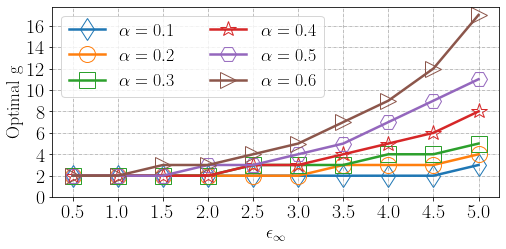

In [25]:
plt.figure(figsize=(8, 3.5))
plt.grid(color='grey', linestyle='dashdot', linewidth=0.5)

markers = ['d', 'o', 's', '*', 'H', '>','X']

idx=0
for alpha in lst_alpha:
    
    olh = []

    for eps_perm in lst_eps:

        g = max(np.rint((np.sqrt(np.exp(4*eps_perm) - 14*np.exp(2*eps_perm) - 12*np.exp(2*eps_perm*(alpha+1)) + 12*np.exp(eps_perm*(alpha+1)) + 12*np.exp(eps_perm*(alpha+3)) + 1) - np.exp(2*eps_perm) + 6*np.exp(eps_perm) - 6*np.exp(eps_perm*alpha) + 1) / (6*(np.exp(eps_perm) - np.exp(eps_perm*alpha)))), 2)
        olh.append(g)

    plt.plot(olh, label=r'$\alpha={}$'.format(round(alpha,2)), marker=markers[idx])
    plt.xlabel('$\epsilon_{\infty}$')
    plt.ylabel('Optimal g')
    idx+=1
plt.yticks(np.arange(0,18, 2), np.arange(0,18, 2))
plt.xticks(range(len(lst_eps)), lst_eps)
plt.legend(loc='upper left', ncol=2)#, bbox_to_anchor=(-0.024, 1.04)
plt.savefig('fig_g_analysis.pdf', dpi=500, bbox_inches = 'tight',pad_inches = 0.1)
plt.show()

## Numerical Analysis of variance values

In [26]:
def Approximate_var_f_l(p1, q1, p2, q2, n = 10000):       
    
    f = 0 # approximate variance
    
    sig = q1*p2 + (1 - q1) * q2 + f*(((p1*p2) - p1*(1-p2)) + (q2*(1-p1) - (1-q2)*(1-p1)))
    
    return (sig * (1 - sig)) / (n * (p1 - q1)**2 * (p2 - q2)**2)

In [27]:
# saving variance values
var_l_sue = {alpha:[] for alpha in lst_alpha} # RAPPOR [1]
var_l_osue = {alpha:[] for alpha in lst_alpha} # L-OSUE [2]
var_ololoha = {alpha:[] for alpha in lst_alpha} 
var_biloloha = {alpha:[] for alpha in lst_alpha}

# 
lst_k = [96]
var_l_grr = {k:{alpha:[] for alpha in lst_alpha} for k in lst_k}

for alpha in lst_alpha:

    for eps_perm in lst_eps:
        eps_1 = alpha * eps_perm
        
        for k in lst_k:
            # L-GRR parameters
            p1_grr = np.exp(eps_perm) / (np.exp(eps_perm) + k - 1)
            q1_grr = (1 - p1_grr) / (k - 1)

            p2_grr = (q1_grr - np.exp(eps_1) * p1_grr) / ((-p1_grr * np.exp(eps_1)) + k*q1_grr*np.exp(eps_1) - q1_grr*np.exp(eps_1) - p1_grr*(k-1)+q1_grr)
            q2_grr = (1 - p2_grr) / (k-1)
            
            var_l_grr[k][alpha].append(Approximate_var_f_l(p1_grr, q1_grr, p2_grr, q2_grr))

        # RAPPOR parameters
        p1_sue = np.exp(eps_perm/2) / (np.exp(eps_perm/2) + 1)
        q1_sue = 1 / (np.exp(eps_perm/2) + 1)

        p2_sue = - (np.sqrt((4 * np.exp(7 * eps_perm / 2) - 4 * np.exp(5 * eps_perm / 2) - 4 * np.exp(
                3 * eps_perm / 2) + 4 * np.exp(eps_perm / 2) + np.exp(4 * eps_perm) + 4 * np.exp(3 * eps_perm) - 10 * np.exp(
                2 * eps_perm) + 4 * np.exp(eps_perm) + 1) * np.exp(eps_1)) * (np.exp(eps_1) - 1) * (
                                np.exp(eps_perm) - 1) ** 2 - (
                                np.exp(eps_1) - np.exp(2 * eps_perm) + 2 * np.exp(eps_perm) - 2 * np.exp(
                            eps_1 + eps_perm) + np.exp(eps_1 + 2 * eps_perm) - 1) * (
                                np.exp(3 * eps_perm / 2) - np.exp(eps_perm / 2) + np.exp(eps_perm) - np.exp(
                            eps_1 + eps_perm / 2) - np.exp(eps_1 + eps_perm) + np.exp(eps_1 + 3 * eps_perm / 2) + np.exp(
                            eps_1 + 2 * eps_perm) - 1)) / ((np.exp(eps_1) - 1) * (np.exp(eps_perm) - 1) ** 2 * (
                        np.exp(eps_1) - np.exp(2 * eps_perm) + 2 * np.exp(eps_perm) - 2 * np.exp(eps_1 + eps_perm) + np.exp(
                    eps_1 + 2 * eps_perm) - 1))
        q2_sue = 1 - p2_sue

        var_l_sue[alpha].append(Approximate_var_f_l(p1_sue, q1_sue, p2_sue, q2_sue))

        # L-OSUE parameters
        p1_oue = 1 / 2
        q1_oue = 1 / (np.exp(eps_perm) + 1)

        p2_oue = (1 - np.exp(eps_1 + eps_perm)) / (np.exp(eps_1) - np.exp(eps_perm) - np.exp(eps_1 + eps_perm) + 1)
        q2_oue = 1 - p2_oue

        var_l_osue[alpha].append(Approximate_var_f_l(p1_oue, q1_oue, p2_oue, q2_oue))

        # OLOLOHA parameters
        g = max(np.rint((np.sqrt(np.exp(4*eps_perm) - 14*np.exp(2*eps_perm) - 12*np.exp(2*eps_perm*(alpha+1)) + 12*np.exp(eps_perm*(alpha+1)) + 12*np.exp(eps_perm*(alpha+3)) + 1) - np.exp(2*eps_perm) + 6*np.exp(eps_perm) - 6*np.exp(eps_perm*alpha) + 1) / (6*(np.exp(eps_perm) - np.exp(eps_perm*alpha)))), 2)
        p1_lh = np.exp(eps_perm) / (np.exp(eps_perm) + g - 1)
        q1_lh = (1 - p1_lh) / (g-1)

        p2_lh = (q1_lh - np.exp(eps_1) * p1_lh) / ((-p1_lh * np.exp(eps_1)) + g*q1_lh*np.exp(eps_1) - q1_lh*np.exp(eps_1) - p1_lh*(g-1)+q1_lh)
        q2_lh = (1 - p2_lh) / (g-1)
        q1_lh = 1 / g

        var_ololoha[alpha].append(Approximate_var_f_l(p1_lh, q1_lh, p2_lh, q2_lh))

        # BiLOLOHA parameters
        g = 2
        p1_lh = np.exp(eps_perm) / (np.exp(eps_perm) + g - 1)
        q1_lh = (1 - p1_lh) / (g-1)

        p2_lh = (q1_lh - np.exp(eps_1) * p1_lh) / ((-p1_lh * np.exp(eps_1)) + g*q1_lh*np.exp(eps_1) - q1_lh*np.exp(eps_1) - p1_lh*(g-1)+q1_lh)
        q2_lh = (1 - p2_lh) / (g-1)
        q1_lh = 1 / g

        var_biloloha[alpha].append(Approximate_var_f_l(p1_lh, q1_lh, p2_lh, q2_lh))

## Reproducing Fig. 2 (variance values analysis) in paper

No handles with labels found to put in legend.


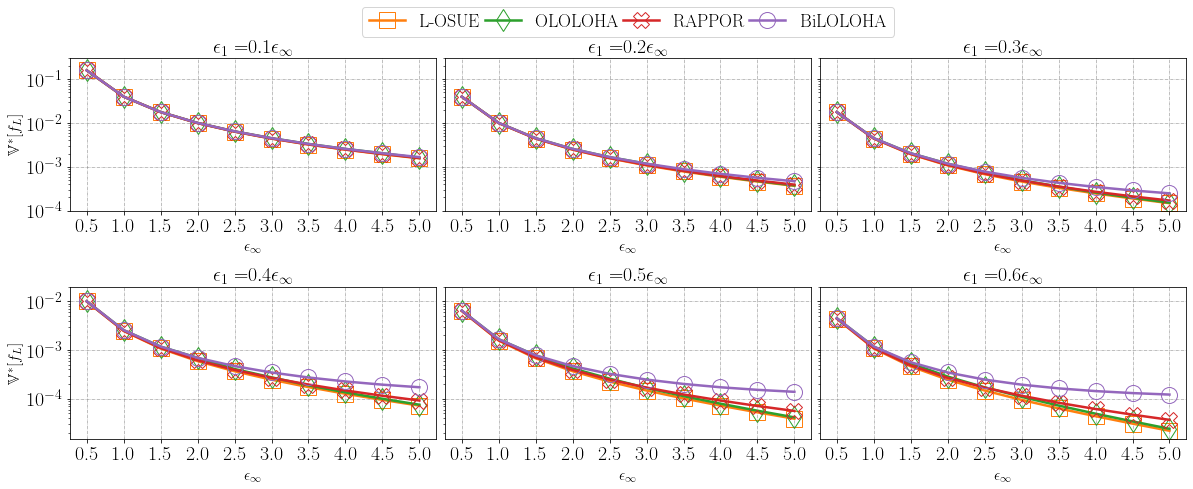

In [33]:
fig, ax = plt.subplots(2, 3, figsize=(20, 7), sharey='row')
plt.subplots_adjust(wspace=0.025, hspace=0.5)

r = 0 #row
c = 0 #column

for alpha in lst_alpha:
    ax[r, c].grid(color='grey', linestyle='dashdot', linewidth=0.5)    
    ax[r, c].plot(var_l_osue[alpha],label='L-OSUE', marker='s', color='tab:orange')
    ax[r, c].plot(var_ololoha[alpha],label='OLOLOHA', marker='d', color='tab:green')
    ax[r, c].plot(var_l_sue[alpha],label='RAPPOR', marker='X', color='tab:red')
    ax[r, c].plot(var_biloloha[alpha],label='BiLOLOHA', marker='o', color='tab:purple')    
    
#     for k in lst_k:
#         ax[r, c].plot(var_l_grr[k][alpha],label='L-GRR[k='+str(k)+']', marker='*', color='tab:pink')
    
    ax[r, c].set_yscale('log')
    ax[r, c].set_xticks(range(len(lst_eps)))
    ax[r, c].set_xticklabels([round(val,4) for val in lst_eps])
    ax[r, 0].set_ylabel(r'$\mathbb{V}^*[f_{L}]$', fontsize=16)
    ax[r, c].set_xlabel("$\epsilon_{\infty}$", fontsize=16)
    ax[r, c].set_title('$\epsilon_1$ $=$' +f'${alpha}$'+ '$\epsilon_{\infty}$', loc='center')
    ax[0, 1].legend(columnspacing=0.2, ncol=6, loc='upper center', bbox_to_anchor=(0.5, 1.4))
    if c<2:
        c+=1
    else:
        c=0
        r += 1

ax[0,0].set_ylim(1e-4, 3e-1)
ax[1,0].set_ylim(1.5e-5, 2e-2)
plt.savefig('fig_var_analysis.pdf', dpi=500, bbox_inches = 'tight',pad_inches = 0.1)
plt.show()